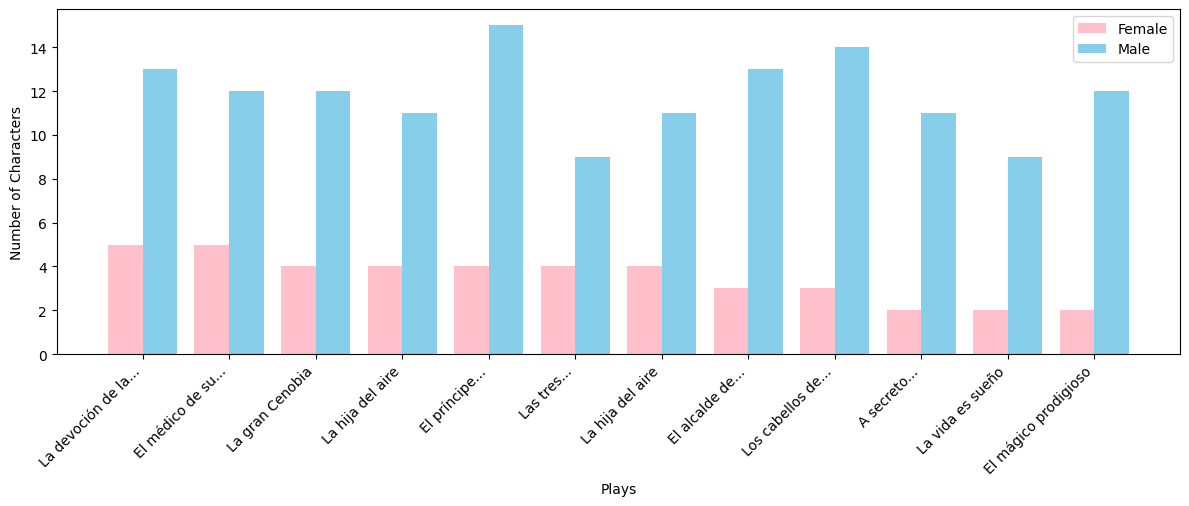

In [2]:
import os
import csv
import matplotlib.pyplot as plt
from xml.etree import ElementTree as ET
import textwrap  # Import the textwrap module

def count_persons(tei_file):
    tree = ET.parse(tei_file)
    root = tree.getroot()

    female_count = 0
    male_count = 0

    for person in root.findall('.//{http://www.tei-c.org/ns/1.0}person'):
        sex = person.get('sex')
        if sex == 'FEMALE':
            female_count += 1
        elif sex == 'MALE':
            male_count += 1

    total_count = female_count + male_count

    return female_count, male_count, total_count

def process_tei_files(input_folder, output_file):
    summary_data = []

    for file_name in os.listdir(input_folder):
        if file_name.endswith('.xml'):
            tei_file = os.path.join(input_folder, file_name)
            female_count, male_count, total_count = count_persons(tei_file)

            # Extracting play title from TEI header
            tree = ET.parse(tei_file)
            title = tree.find('.//{http://www.tei-c.org/ns/1.0}titleStmt/{http://www.tei-c.org/ns/1.0}title[@type="main"]').text

            summary_data.append({
                'Title': title,
                'FemaleCount': female_count,
                'MaleCount': male_count,
                'TotalCount': total_count
            })

    # Sort by FemaleCount in descending order
    summary_data = sorted(summary_data, key=lambda x: x['FemaleCount'], reverse=True)[:20]

    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Title', 'FemaleCount', 'MaleCount', 'TotalCount']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for summary in summary_data:
            writer.writerow(summary)

    # Create a bar diagram for the top 20 plays without the total count
    titles = [summary['Title'] for summary in summary_data]
    female_counts = [summary['FemaleCount'] for summary in summary_data]
    male_counts = [summary['MaleCount'] for summary in summary_data]

    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.4
    bar_positions = range(len(titles))

    # Specify colors for female and male bars
    female_color = 'pink'
    male_color = 'skyblue'

    ax.bar(bar_positions, female_counts, width=bar_width, label='Female', color=female_color)
    ax.bar([pos + bar_width for pos in bar_positions], male_counts, width=bar_width, label='Male', color=male_color)

    # Shorten the title to 10 characters using textwrap
    shortened_titles = [textwrap.shorten(title, width=20, placeholder="...") for title in titles]

    ax.set_xticks([pos + 0.5 * bar_width for pos in bar_positions])
    ax.set_xticklabels(shortened_titles, rotation=45, ha='right')

    ax.set_xlabel('Plays')
    ax.set_ylabel('Number of Characters')

    ax.legend()

    plt.tight_layout()

    # Increase the bottom margin to prevent cutting off the x-axis
    plt.subplots_adjust(bottom=0.4)

    # Save the resulting image as PNG
    plt.savefig("output/img/person_summary_plot.png", format="png")

    plt.show()

if __name__ == "__main__":
    input_folder = "results"
    output_file = "output/csv/person_summary_results_output_top20.csv"

    process_tei_files(input_folder, output_file)
